# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import os
import pprint
import seaborn as sns
from scipy.stats import linregress

sns.set(style="darkgrid")



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

C:\Users\DANISH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Generate Cities List

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"
url = "http://api.openweathermap.org/data/2.5/weather?"

record = []
keep_cities = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []


with open('processing_record.txt', 'w') as f:
    f.write("Beginning Data Retrieval \n ----------------------------- \n")
    for city in cities:
        query_url = f"{url}appid={api_key}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        f.write(f"Processing Record {int(cities.index(city))+1} of Set 1 | {city} \n {query_url} \n")
        
        try:
            keep_cities.append(weather_json['name'])
            cloudiness.append(weather_json['clouds']['all'])
            countries.append(weather_json['sys']['country'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            lat.append(weather_json['coord']['lat'])
            lng.append(weather_json['coord']['lon'])
            max_temp.append(weather_json['main']['temp_max'])
            wind.append(weather_json['wind']['speed'])
        except:
            print(f"Skipping {city}.")
            continue

Skipping nizhneyansk.
Skipping attawapiskat.
Skipping grand river south east.
Skipping sentyabrskiy.
Skipping karamay.
Skipping galgani.
Skipping umzimvubu.
Skipping mys shmidta.
Skipping makung.
Skipping taolanaro.
Skipping barentsburg.
Skipping kuche.
Skipping alotau.
Skipping katsiveli.
Skipping sorvag.
Skipping hihifo.
Skipping samusu.
Skipping vaitupu.
Skipping tabiauea.
Skipping illoqqortoormiut.
Skipping tsihombe.
Skipping agha jari.
Skipping karaul.
Skipping tlaxiaca.
Skipping amderma.
Skipping tasbuget.
Skipping tsienyane.
Skipping yuzhno-yeniseyskiy.
Skipping lephepe.
Skipping palabuhanratu.
Skipping saleaula.
Skipping louisbourg.
Skipping tumannyy.
Skipping belushya guba.
Skipping stantsiya gorchakovo.
Skipping scottsburgh.
Skipping armacao dos buzios.
Skipping bargal.
Skipping yeletskiy.
Skipping saryshagan.
Skipping lar gerd.
Skipping buqayq.
Skipping tawkar.
Skipping sulurpeta.
Skipping straldza.
Skipping kamenskoye.
Skipping slobozia-conachi.
Skipping rungata.
Skipping m

In [4]:
weather_dict = {
    "City": keep_cities,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind,
}
weather_data = pd.DataFrame(weather_dict)
print(f"Number of cities after dropped NaN values is {len(weather_data)}.")
weather_data.count()

Number of cities after dropped NaN values is 571.


City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [5]:
# Display the City Data Frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mar del Plata,40,AR,1590523178,71,-38.00,-57.56,286.15,2.10
1,Busselton,91,AU,1590523178,78,-33.65,115.33,285.37,6.79
2,Quatre Cocos,20,MU,1590523178,78,-20.21,57.76,297.04,4.10
3,Ushuaia,75,AR,1590523124,81,-54.80,-68.30,281.15,3.28
4,Mataura,52,NZ,1590523179,93,-46.19,168.86,277.00,0.83


## Latitude vs. Temperature Plot

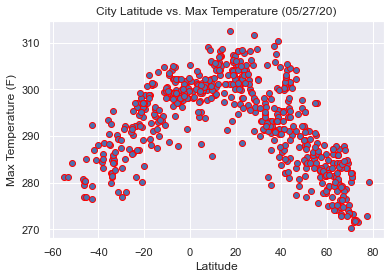

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"],
            edgecolor="red", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_Max_temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

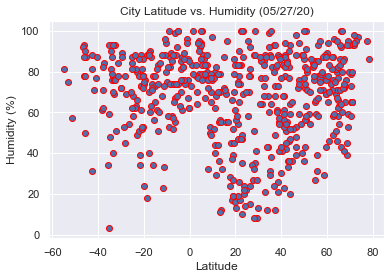

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"],
            edgecolor="red", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

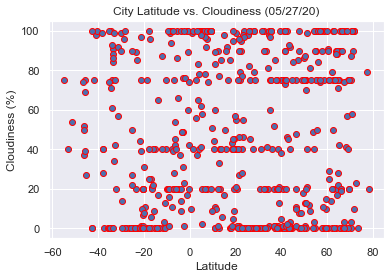

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"],
            edgecolor="red", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

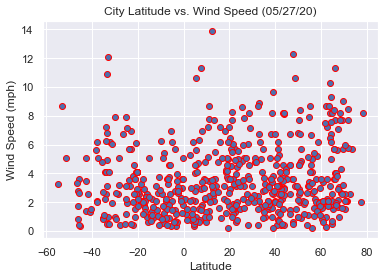

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(weather_data["Lat"], 
            weather_data["Wind Speed"],
            edgecolor="red", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

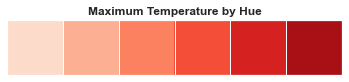

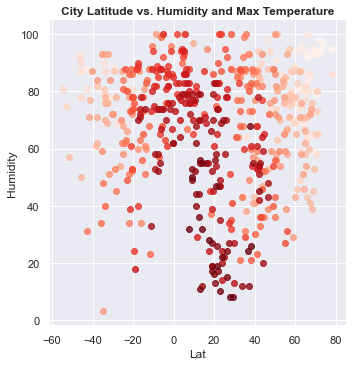

In [10]:
sns.palplot(sns.color_palette("Reds"))
plt.title(f"Maximum Temperature by Hue", weight="bold")

sns.lmplot(x='Lat', y='Humidity', hue = "Max Temp",
           data=weather_data, fit_reg=False, legend=False, palette = "Reds")

plt.title(f"City Latitude vs. Humidity and Max Temperature", weight="bold")

plt.show()

## Linear Regression

In [11]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8118354465097295


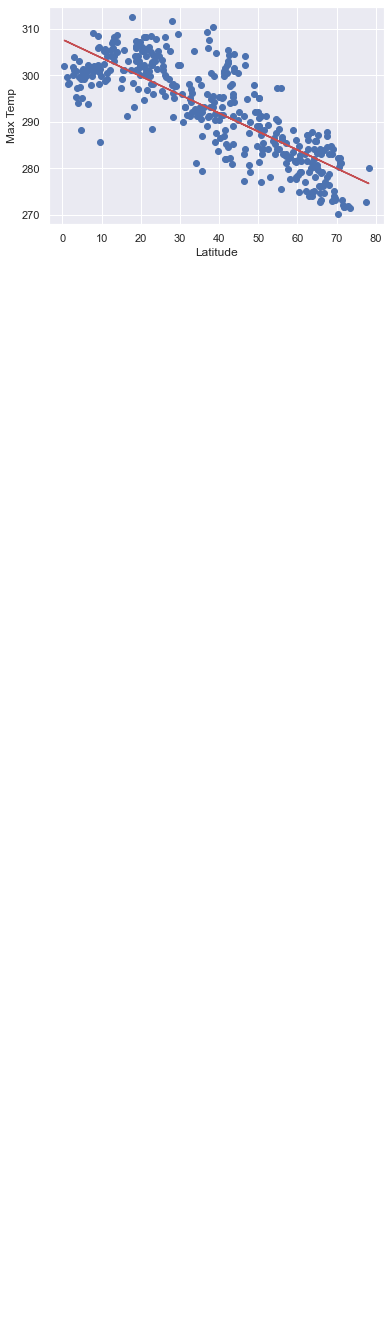

In [13]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.8001971740474321


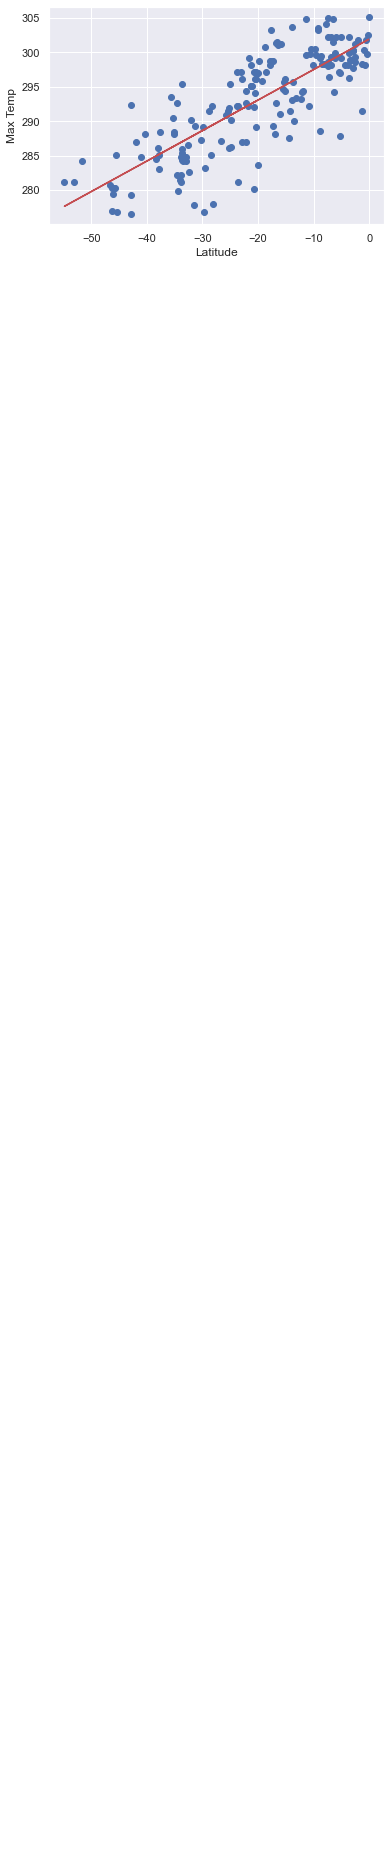

In [14]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1219416081128443


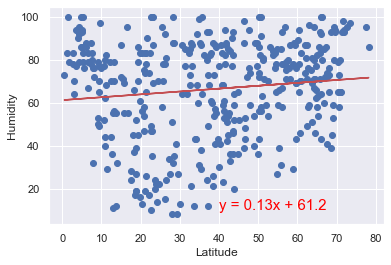

In [15]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.07853613536172303


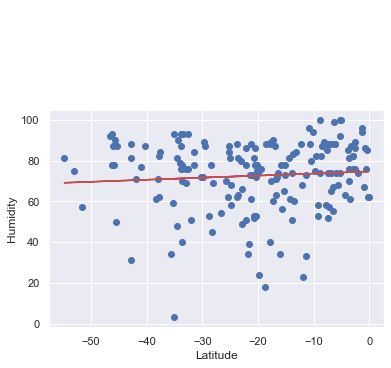

In [16]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06676476371969406


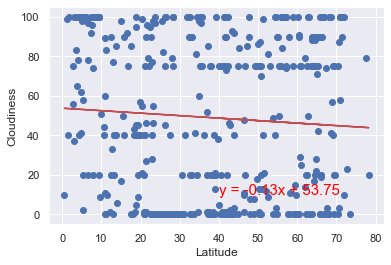

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: -0.08529989558102777


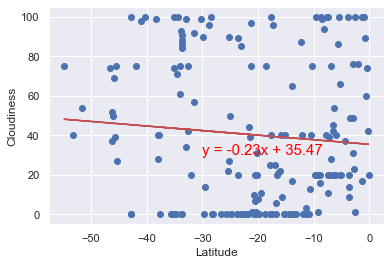

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08421881004495434


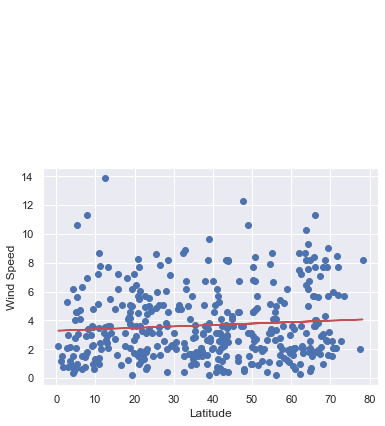

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.1961090052166736


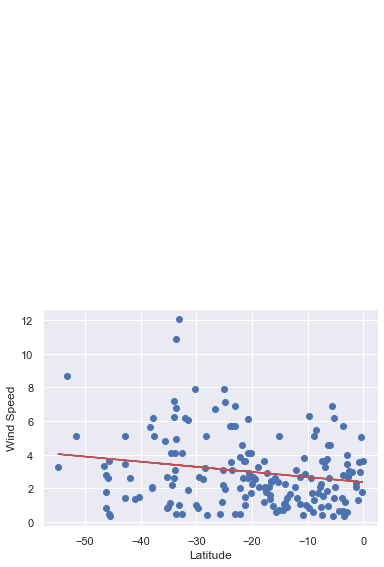

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.